In [1]:
import numpy as np
import pandas as pd 

from sklearn.preprocessing import LabelEncoder 

import os
import csv

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/husey/Automobile_data.csv') # hepsi '/' olmalı '\' çalışmaz
#aktüerya verisi

In [3]:
print('Training data shape: ', df.shape)

Training data shape:  (205, 26)


In [4]:
df.head()
#bağımlı değişken 'symboling': fiyat açısında risk

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
df.describe(include='all')     #sadece sayısal verilere erişim sağlıyoruz
x=df
y=df.iloc[:,0]

In [6]:
y.head()

0    3
1    3
2    1
3    2
4    2
Name: symboling, dtype: int64

In [7]:
x.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [8]:
y[:].value_counts() #frekans dağılımı

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

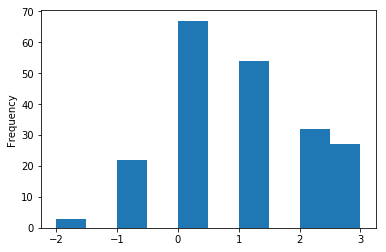

In [9]:
y[:].astype(int).plot.hist(); #frekans dağılımı grafiği

In [10]:
x=x.replace('?', np.nan)

In [11]:
# sütunlara göre eksik veriler 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [12]:
missing_values = missing_values_table(x)
missing_values.head()

Your selected dataframe has 26 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
normalized-losses,41,20.0
bore,4,2.0
stroke,4,2.0
price,4,2.0
num-of-doors,2,1.0


In [13]:
x['normalized-losses']=x['normalized-losses'].astype(str).astype(float)
x['bore']=x['bore'].astype(str).astype(float)
x['stroke']=x['stroke'].astype(str).astype(float)
x['price']=x['price'].astype(str).astype(float)
x['horsepower']=x['horsepower'].astype(str).astype(float)
x['peak-rpm']=x['peak-rpm'].astype(str).astype(float)
x=x.fillna(x.mean())
x = x.fillna(df['num-of-doors'].value_counts().index[0])

#eksik verileri olan verilerin ortalamaları ile doldurduk

In [14]:
missing_values = missing_values_table(x)
missing_values.head()

Your selected dataframe has 26 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [15]:
x.describe(include='all') #Genel bilgi dataframe

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,116,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


In [16]:
x.dtypes.value_counts() # veri tipleri

float64    11
object     10
int64       5
dtype: int64

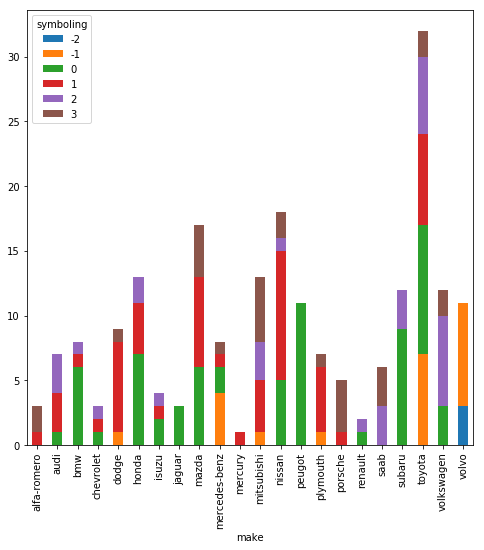

In [17]:
make_symboling_table = pd.crosstab(index=x["make"], 
                          columns=x["symboling"])


make_symboling_table .plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

#make markalar, symboling otomobilin risk faktörü

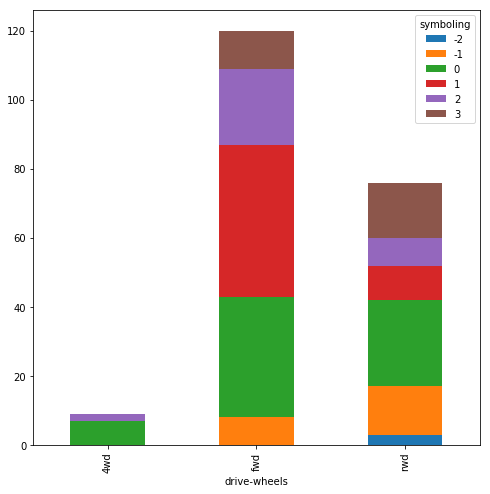

In [18]:
make_symboling_table = pd.crosstab(index=x["drive-wheels"], 
                          columns=x["symboling"])
make_symboling_table .plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
#'wheel drive' arabının çekiş noktası

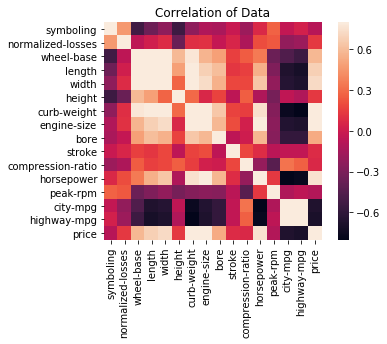

In [19]:
data_corr = x.corr()
sns.heatmap(data_corr , vmax=.8, square=True)
plt.title("Correlation of Data")
plt.show()

In [20]:
data_corr['symboling'].sort_values(ascending=False)

symboling            1.000000
normalized-losses    0.465190
peak-rpm             0.273679
horsepower           0.071389
highway-mpg          0.034606
stroke              -0.008689
city-mpg            -0.035823
price               -0.082201
engine-size         -0.105790
bore                -0.130083
compression-ratio   -0.178515
curb-weight         -0.227691
width               -0.232919
length              -0.357612
wheel-base          -0.531954
height              -0.541038
Name: symboling, dtype: float64

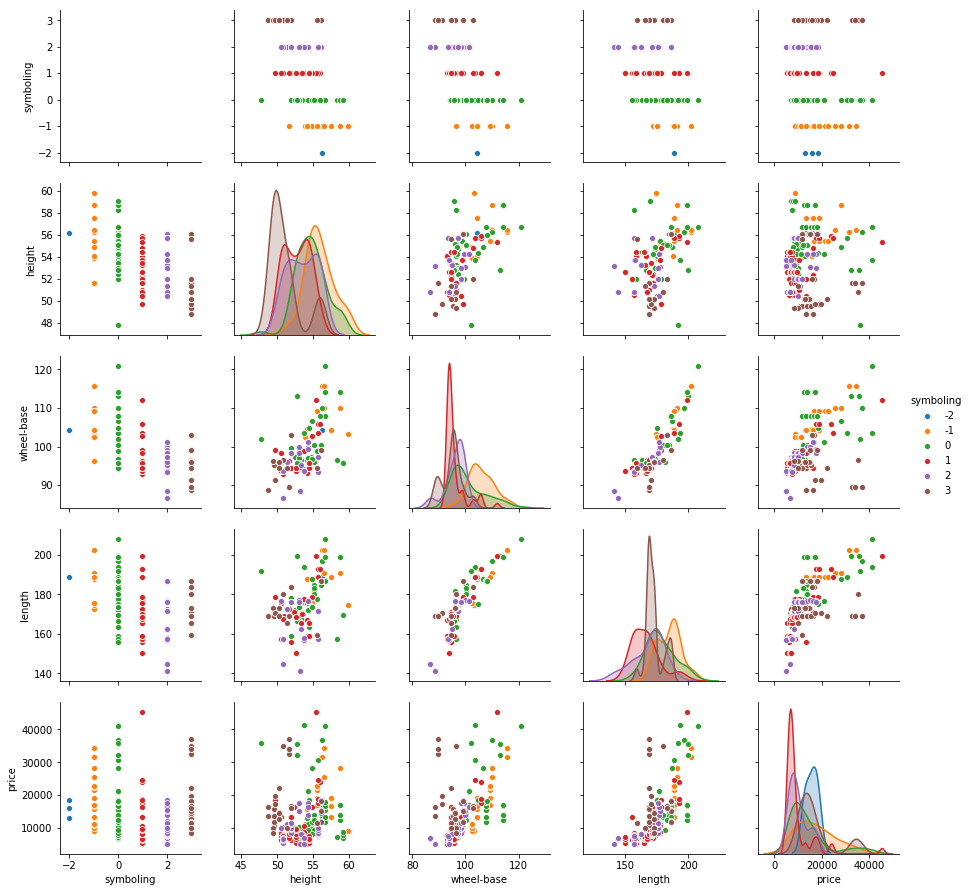

In [21]:
a=x[['symboling','height','wheel-base','length','price']]
sns.pairplot(a, hue='symboling', height=2.5);
#2 yönlü ilişkiler

In [22]:
x.select_dtypes('object').apply(pd.Series.nunique, axis = 0)
#farklı girdi sayıları fdw-rdw-4dw gibi

make                22
fuel-type            2
aspiration           2
num-of-doors         2
body-style           5
drive-wheels         3
engine-location      2
engine-type          7
num-of-cylinders     7
fuel-system          8
dtype: int64

In [23]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in x:
    if x[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(x[col].unique())) <= 2:
            # Train on the training data
            le.fit(x[col])
            # Transform both training and testing data
            x[col] = le.transform(x[col])
                        
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

###2 veya daha az farklı girdisi bulunan sütunları encode ettik

4 columns were label encoded.


In [24]:
x = pd.get_dummies(x)

print('Training Features shape: ', x.shape)

#kategorik veriyi kukla değişkene çevirdik

Training Features shape:  (205, 72)


In [25]:
x.columns

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make_alfa-romero', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-type_dohc',
       'engine-type_dohcv', 'engine-type_l', 'engine-type_ohc',
       'engine-type_ohcf', 'engine-ty

In [26]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [27]:
#Normalizasyon
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)
print(x_test)

[[0.6        0.20418848 1.         ... 0.         0.         0.        ]
 [0.2        0.29842932 1.         ... 1.         0.         0.        ]
 [0.8        0.29842932 1.         ... 1.         0.         0.        ]
 ...
 [0.6        0.27748691 1.         ... 0.         0.         0.        ]
 [0.6        0.29842932 1.         ... 1.         0.         0.        ]
 [0.6        0.29842932 1.         ... 0.         0.         0.        ]]


C:\Users\husey\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [28]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski',n_jobs=1)  
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
y_pred = classifier.predict(x_test)

###Accuracy = TP+TN/TP+FP+FN+TN
###Precision (PPV) = TP/TP+FP doğru tahmin edilen pozitif gözlemlerin, öngörülen pozitif gözlemlere oranı 
###Recall (Sensitivity) - doğru tahmin edilmiş gözlemlerin, asıl sınıftaki tüm gözlemlere oranı.
###Recall = TP/TP+FN
###F1 score - Recall(sens)/Recall
###F1 Score = 2(Recall Precision) / (Recall + Precision)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  

print(classification_report(y_test, y_pred))


[[1 1 0 0 0]
 [1 9 2 0 0]
 [0 2 7 0 1]
 [0 1 3 5 1]
 [0 0 3 2 2]]
              precision    recall  f1-score   support

          -1       0.50      0.50      0.50         2
           0       0.69      0.75      0.72        12
           1       0.47      0.70      0.56        10
           2       0.71      0.50      0.59        10
           3       0.50      0.29      0.36         7

   micro avg       0.59      0.59      0.59        41
   macro avg       0.57      0.55      0.55        41
weighted avg       0.60      0.59      0.58        41



In [31]:
error = []

# 1 ile 40 arasındaki K değerleri için hata tahminliyoruz.
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

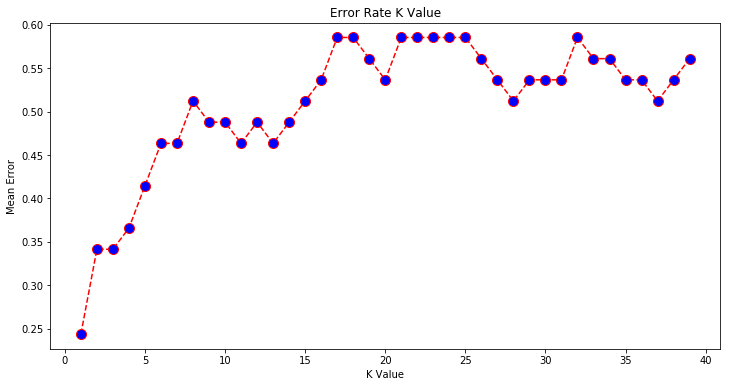

In [32]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [33]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)  

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

x2=x[['price','height','make_peugot','make_volvo','make_subaru','normalized-losses','wheel-base']]
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import precision_score

PS=0
for w in range (0,20):
    x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.20)
    scaler = MinMaxScaler()  
    scaler.fit(x2)
    x2_train = scaler.transform(x2_train)  
    x2_test = scaler.transform(x2_test) 

    clf = KNeighborsClassifier(n_neighbors = 3)
    cm=confusion_matrix(y_test, y_pred)
    classifier.fit(x2_train, y_train)
    y_pred = classifier.predict(x2_test)
    PS=precision_score(y_test, y_pred, average='macro')+PS
    
    
PS=PS/20
from sklearn.metrics import classification_report, confusion_matrix  
print(cm)  
print ('Average precision: %0.2f' % PS)
print(classification_report(y_test, y_pred))

[[1 2 2 0 2]
 [2 2 5 0 4]
 [0 3 3 0 1]
 [1 2 1 2 3]
 [1 3 0 0 1]]
Average precision: 0.75
              precision    recall  f1-score   support

          -1       1.00      0.86      0.92         7
           0       0.59      0.77      0.67        13
           1       0.75      0.86      0.80         7
           2       0.71      0.56      0.63         9
           3       1.00      0.60      0.75         5

   micro avg       0.73      0.73      0.73        41
   macro avg       0.81      0.73      0.75        41
weighted avg       0.76      0.73      0.73        41



C:\Users\husey\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\husey\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\husey\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\husey\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\husey\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, fl